# An Introduction to ARC 3.0: Alkali.ne Rydberg Calculator

Authors: Elizabeth J. Robertson, Nikola Šibalić, Robert M. Potvliege, Matthew P. A. Jones

Updated 15/11/2020

This notebooks gives examples of new functionality introduced in ARC version 3.0: support for calculations of states, Stark maps and pair-state interactions for **Alkaline Earths**, pertubative van der Waals $C_6$ calculations in manifold of energy-degenerate states, inter-species pair-state calculatons, and general new calculation methods for working with **Wavefunctions** (supported for Alkali only), **Optical lattices** in 1D (calculation of recoil energies, Bloch bands, Wannier states...), **atom-surface van der Waals interactions** and calculation of **dynamic polarisabilities** (magic wavelengths and other details useful for atom-trapping).
For introduction to Rydberg-state calculations, also available in the original ARC version, we point users to the [An Introduction to Rydberg atoms with ARC](https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/_static/Rydberg_atoms_a_primer.html) . For general introduction into physics of Rydberg states and their properties and applications see [Rydberg Physics ebook published by IOP](https://doi.org/10.1088/978-0-7503-1635-4).

For more details please see E. J. Robertson, N. Šibalić, R. M. Potvliege, M. P. A. Jones, ARC 3.0: An expanded Python toolbox for atomic physics calculations, *Computer Physics Communications* **261**, 107814 (2021) [https://doi.org/10.1016/j.cpc.2020.107814](https://doi.org/10.1016/j.cpc.2020.107814)

**Contents:**

0. [Preliminaries: general note on using ARC with Alkaline Earths](#Preliminaries:-general-note-on-using-ARC-with-Alkaline-Earths)
1. [General atom calculations with Alkaline earths](#General-atom-calculations-with-Alkaline-earths)
2. [Stark maps with Alkaline Earths](#Stark-maps-with-Alkaline-Earths)
3. [Pair-state interactions between Rydberg states of Alkaline Earths](#Pair-state-interactions-between-Rydberg-states-of-Alkaline-Earths)

   3.1 [Pertubative C6 calculation in the manifold of degenerate states](#Pertubative-C6-calculation-in-the-manifold-of-degenerate-states)

4. [Inter-species pair-state calculations](#Inter-species-pair-state-calculations)
5. [Stark tuned Forster resonances](#Stark-tuned-Forster-resonances)
6. [Wavefunction calculations for Alkali atom Rydberg states](#Wavefunction-calculations-for-Alkali-atom-Rydberg-states)
7. [Atom-surface van der Waals interactions ($C_3$ calculation)](#Atom-surface-van-der-Waals-interactions-(C3-calculation))
8. [Optical lattice calculations (Bloch bands, Wannier states...)](#Optical-lattice-calculations-(Bloch-bands,-Wannier-states...))
9. [Calculations of dynamic polarisability and magic wavelengths for optical traps](#Calculations-of-dynamic-polarisability-and-magic-wavelengths-for-optical-traps)

# Preliminaries: general note on using ARC with Alkaline Earths

Dipole matrix elements for Alkaline Earths are calculated using single active electron approximation. DME are calculated based using semi-classical approximation. DME obtained in this way are in general correct for higher lying states only. See publication for details.

Install latest version of ARC

In [1]:
!pip install ARC-Alkali-Rydberg-Calculator --upgrade --no-cache-dir

To use ARC in your Python project, import module as

In [3]:
import arc as arc

In [4]:
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
import scipy as sp
import scipy.constants

In [5]:
""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon_0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
e = sp.constants.e
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

# Define Ytterbium class

In [52]:
class Ytterbium174B(DivalentAtom):
    """
    Properties of Ytterbium 174 atoms
    """

    ionisationEnergycm = 50443.07074 # cm-1  ref. [#yb3]
    ionisationEnergy = ionisationEnergycm / 8065.544  # eV ref.

    Z = 70
    I = 0

    #: TODO source
    scaledRydbergConstant = 109736.627 * 1e2 * \
        physical_constants["inverse meter-electron volt relationship"][0]

    
    quantumDefect = [[[4.278337, -5.625, 91.65, -156050, -4.973e7, 1.102e10],
                      [3.95433, -12.33, 1729.0, 0.0, 0.0, 0.0],
                      [2.713094, -1.8646, -2145.5,  3940500, -3.1036e9, 1.0690e12],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]],
                     [[1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [5.53658095, -1.62860818e3, 8.89586904e5, -2.56965006e8, 3.68075379e10, -2.05360653e12],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]],
                     [[1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [3.35341176, 1.39820521e4, -5.21416397e7, 8.52192405e10, -6.58314910e13, -1.95529526e16],
                      [2.748679, -0.5200, -1186.01,  1564600, -9.8134e8, 2.426e11],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]],
                     [[4.4382, 6.0, -1.8e4, 1.8e7, -7.0e9, 0.0],
                      [3.91038501, 4.44122338e1, -6.00452428e4, 2.91808081e7, -6.11071416e9, 4.59331291e11],
                     [2.729,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9],
                      [1e-9,1e-9, 1e-9, 1e-9, 1e-9,1e-9]]]
    
    """ Contains list of modified Rydberg-Ritz coefficients for calculating
        quantum defects for
        [[ :math:`^1S_{0},^1P_{1},^1D_{2},^1F_{3}`],
        [ :math:`^3S_{0},^3P_{0},^3D_{1},^3F_{2}`],
        [ :math:`^3S_{0},^3P_{1},^3D_{2},^3F_{3}`],
        [ :math:`^3S_{1},^3P_{2},^3D_{3},^3F_{4}`]]."""

    #3S1: https://arxiv.org/pdf/1912.08754.pdf
    #1S0, 1D2, 3D2: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.98.062506?casa_token=pPBhrZ-7EEsAAAAA%3AcQenteyGZIEsoy3M2fF1vQLvwHpW_dPubroCIzQ1lgcilhoJnSoqsoSoDjNBNmiyfuk7opAa8Orsfw
    #1P1: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.45.1732
    #3P0,1,2: https://iopscience.iop.org/article/10.1088/0022-3700/17/18/006/pdf
    #3D3 : https://arxiv.org/pdf/2204.07995.pdf

    groundStateN = 6
    extraLevels = []  #: TODO unkown if such exist at time of writing

    #: Sources Refs. [#yb1]_, [#yb2]_, [#yb3]_
    levelDataFromNIST = "yb_level_data.csv"

    precalculatedDB = "yb_precalculated.db"
    dipoleMatrixElementFile = "yb_dipole_matrix_elements.npy"
    quadrupoleMatrixElementFile = "yb_quadrupole_matrix_elements.npy"

    literatureDMEfilename = 'ytterbium_literature_dme.csv'

    elementName = 'Yb174'
    meltingPoint = 819 + 273.15  #: in K

    #: Ref. [#nist]_
    mass = 173.9388664 * \
        physical_constants["atomic mass constant"][0]

    #: Quantum defect principal quantum number fitting ranges for different
    #: series
    defectFittingRange = {"1S0": [23, 80], "1P1": [39, 55], 
                          "1D2": [31, 80], "3D2": [28, 80], 
                          "3S1": [35, 80], "3P0": [19, 33],
                          "3P1": [34, 84], "3P2": [18, 93]}

# General atom calculations with Alkaline earths

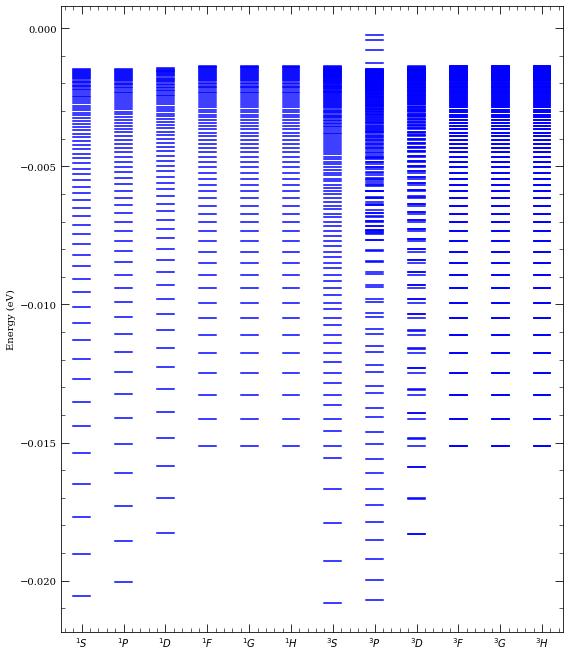

In [53]:
atom2= Ytterbium174B()

calc = arc.LevelPlot(atom2)
calc.makeLevels(30,100,0,5,sList=[0,1])
calc.drawLevels()
calc.showPlot()

NOTE: Interactive clickable plot, allowing finding wavelengths and frequencies for transitions beteen different states, opens if used from command line as in in ```python code.py```
or if notebook is initialised with stand-alone, instead inline figures. This requires calling following line after import of arc:

We will use inline plots for the rest of this notebook, but it's easy to switch

### Test simple d.m.e and related calcualtion

In [44]:

atom2.getRadialMatrixElement(15,0,0, 15, 1, 1, s=0)


164.15280265432278

In [45]:
print(atom2.getDipoleMatrixElement(15,0,0,0,15,1,1,0,0,s=0))
print(atom2._getRadialDipoleSemiClassical(
            15,0, 0, 15, 1, 1, s=0            ))
print(atom2.getQuantumDefect(6, 0, 0, s=0))

94.77366480070474
168.4927240733902
47511316.293786354


In [46]:
print(atom2.getDipoleMatrixElement(15,0,1,0,15,1,2,0,0,s=1))

0.22493307975649462


### Plot quantum defects

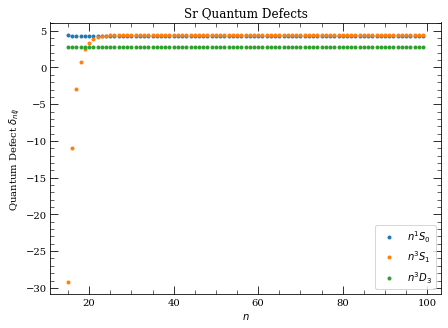

In [54]:
n=np.arange(15,100,1)
    
fig, axes = plt.subplots(1, 1, figsize=(7,5))

axes.plot(n,atom2.getQuantumDefect(n,0,0,s=0),'.',
          label=("$%s$" % printStateStringLatex("n",0,0,s=0) ))

axes.plot(n,atom2.getQuantumDefect(n,0,1,s=1),'.',
          label=("$%s$"% printStateStringLatex("n",0,1,s=1) ) )

axes.plot(n,atom2.getQuantumDefect(n,2,3,s=1),'.',
          label=("$%s$"% printStateStringLatex("n",2,3,s=1) ) )

axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('Sr Quantum Defects')
plt.show()

In [58]:

print("%.9f nm" % (atom2.getTransitionWavelength(6,0,0, 75, 0, 1, s=0, s2=1) *1e9) )
print("%.9f THz" % (atom2.getTransitionFrequency(6,0,0, 75, 0, 1, s=0, s2=1) *1e-12) )

198.329943163 nm
1511.584449721 THz


In [59]:

atom2.getEnergy(75,0,1,s=1)

-0.0027326637433244165

# Stark maps with Alkaline Earths


Found  600  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


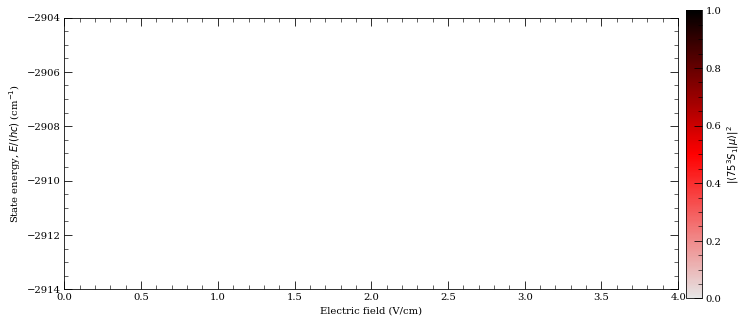

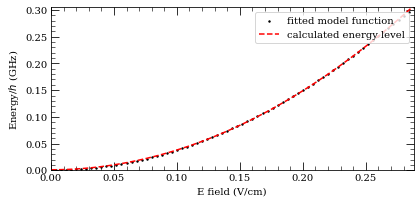

-7396.52092 MHz cm^2 / V^2 


In [60]:
calc = StarkMap(Ytterbium174B())

# Target state
n0=75;l0=0;j0=1;mj0=1;  
# Define max/min n values in basis
nmin=n0-5
nmax=n0+5
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin=0. # Min E field (V/m)
Emax=4.e2 # Max E field (V/m)
N=1001 # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=0,highlightState = True)

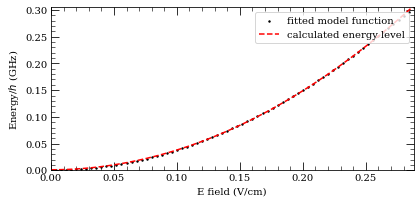

-7396.52092 MHz cm^2 / V^2 


In [62]:
calc.ax.set_ylim(-2914, -2904)
calc.showPlot(interactive = True)
# Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

In [63]:
np.sqrt(30/7396)

0.0636886694773449

Found  600  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


0

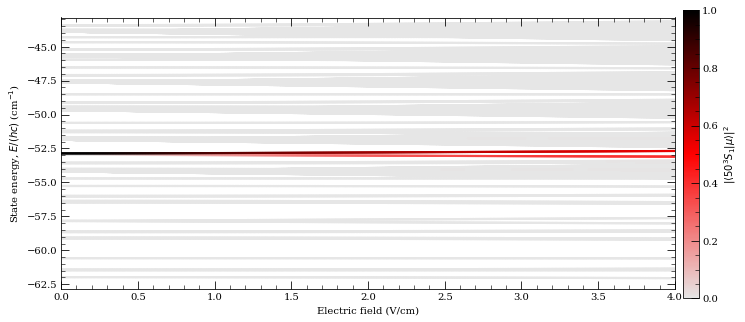

In [78]:
calc = StarkMap(Ytterbium174B())

# Target state
n0=50;l0=0;j0=1;mj0=1;  
# Define max/min n values in basis
nmin=n0-5
nmax=n0+5
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin=0. # Min E field (V/m)
Emax=4.e2 # Max E field (V/m)
N=1001 # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=0,highlightState = True)

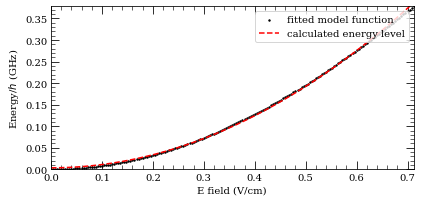

-1511.42075 MHz cm^2 / V^2 


In [79]:
calc.ax.set_ylim(-2914, -2904)
calc.showPlot(interactive = True)
# Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

# Pair-state interactions between Rydberg states of Alkaline Earths


Calculating Hamiltonian matrix...


	matrix (dimension  3007 )

Matrix R3 100.0 % (state 663 of 663)



Diagonalizing interaction matrix...

99% Now we are plotting...


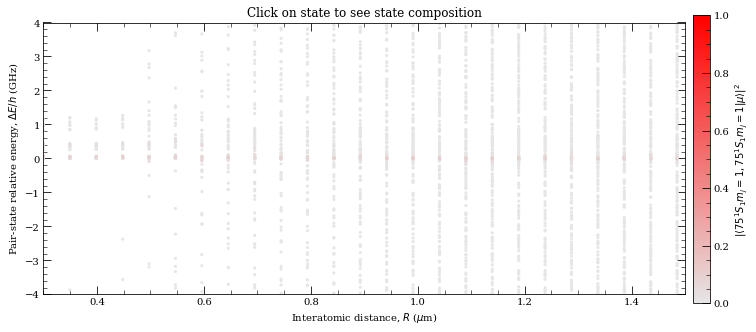

0

In [68]:
n0=75;l0=0;j0=1;mj0=1; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 45e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Ytterbium174B(),
                             n0,l0,j0,
                             n0,l0,j0,
                             mj0,mj0,interactionsUpTo = 1,
                             s=0)

#R array (um)
r=np.linspace(0.3,20,400)

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,
                 progressOutput=True, debugOutput=False)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.3,1.5)
calc.ax.set_ylim(-4,4)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

In [69]:
value = []
nValue = [25,30,35,40,45,50,55,60,65,70,75,80]
for n in nValue:
    calculation1 = PairStateInteractions(Ytterbium174B(), n, 0, 0, n, 0, 0, 0, 0, s=0)
    state = printStateString(n,0,0,s=0)+" mj=0"
    c6 = calculation1.getC6perturbatively(0,0, 6, 65e9)
    value.append(c6)
    print("C_6 [%s] = %.5f GHz (mu m)^6" % (state,c6))


C_6 [25 1S 0 mj=0] = -0.00000 GHz (mu m)^6
C_6 [30 1S 0 mj=0] = -0.00000 GHz (mu m)^6
C_6 [35 1S 0 mj=0] = 0.00000 GHz (mu m)^6
C_6 [40 1S 0 mj=0] = -0.07551 GHz (mu m)^6
C_6 [45 1S 0 mj=0] = -0.07513 GHz (mu m)^6
C_6 [50 1S 0 mj=0] = -0.27895 GHz (mu m)^6
C_6 [55 1S 0 mj=0] = -0.90068 GHz (mu m)^6
C_6 [60 1S 0 mj=0] = -3.21695 GHz (mu m)^6
C_6 [65 1S 0 mj=0] = -8.43609 GHz (mu m)^6
C_6 [70 1S 0 mj=0] = -20.71116 GHz (mu m)^6
C_6 [75 1S 0 mj=0] = -47.06198 GHz (mu m)^6
C_6 [80 1S 0 mj=0] = -101.21829 GHz (mu m)^6


Text(0, 0.5, '$C_6$(GHz $\\mu$m$^6$)')

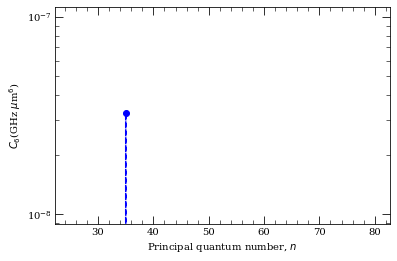

In [70]:
f = plt.figure();
ax = f.add_subplot(1,1,1)
ax.semilogy(nValue, value,"bo--")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$(GHz $\mu$m$^6$)")

This matches nicely with result from Mukherjee, Rick, "Strong interactions in alkaline-earth Rydberg ensembles", PhD thesis (2013), (Fig. 3.6)

# Calculations of dynamic polarisability and magic wavelengths for optical traps


In [71]:
atom = Cesium()
n = 10
calc = DynamicPolarizability(atom, n, 1, 1.5)
calc.defineBasis(atom.groundStateN, n+15)
alpha0, alpha1, alpha2, core, dynamic, closestState = calc.getPolarizability(1100e-9,units="au", accountForStateLifetime=True)

print("alpha0 = %.3e a.u." % (alpha0))
print("alpha2 = %.3e a.u." % (alpha2))


alpha0 = -4.699e+02 a.u.
alpha2 = -2.370e+01 a.u.


Resonance: 1172.05 nm 14 2S 1/2
Resonance: 1186.07 nm 12 2D 3/2
Resonance: 1209.19 nm 13 2S 1/2
Resonance: 1229.93 nm 11 2D 3/2
Resonance: 1265.39 nm 12 2S 1/2
Resonance: 1298.32 nm 10 2D 3/2


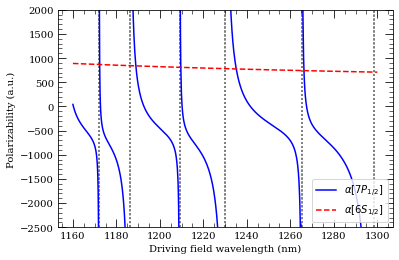

In [72]:
atom = Cesium()
n = 7
calc = DynamicPolarizability(atom, n, 1, 0.5)
calc.defineBasis(atom.groundStateN, n+15)
calc.getPolarizability(1100e-9,units="a.u.")


calcGroundState = DynamicPolarizability(atom, 6, 0, 0.5)
calcGroundState.defineBasis(atom.groundStateN, 25)

wavelengthList = np.linspace(1160, 1300,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, debugOutput=True, units="au")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-2500,2000)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1357.56 nm 11 2S 1/2
Resonance: 1376.58 nm 5 2D 3/2
Resonance: 1416.12 nm 9 2D 3/2
Resonance: 1530.73 nm 10 2S 1/2
Resonance: 1654.35 nm 8 2D 3/2


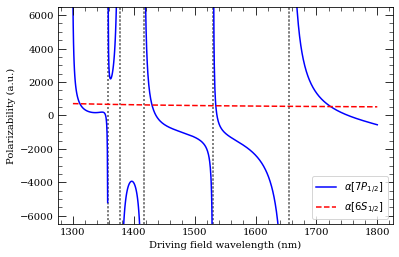

In [73]:
wavelengthList = np.linspace(1300, 1800,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, debugOutput=True, units="au")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-6500,6500)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1170.37 nm 15 2S 1/2
Resonance: 1180.52 nm 13 2D 5/2
Resonance: 1197.47 nm 14 2S 1/2
Resonance: 1211.76 nm 12 2D 5/2
Resonance: 1236.20 nm 13 2S 1/2
Resonance: 1257.42 nm 11 2D 5/2
Resonance: 1294.96 nm 12 2S 1/2
Resonance: 1180.52 nm 13 2D 5/2
Resonance: 1211.76 nm 12 2D 5/2
Resonance: 1212.11 nm 12 2D 3/2
Resonance: 1257.42 nm 11 2D 5/2
Resonance: 1257.91 nm 11 2D 3/2


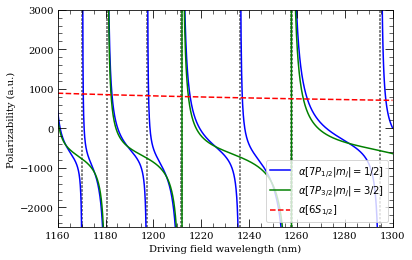

In [74]:
atom = Cesium()

n = 7
calc = DynamicPolarizability(atom, n, 1, 1.5)
calc.defineBasis(atom.groundStateN, 16)

calcGroundState = DynamicPolarizability(atom, 6, 0, 0.5)
calcGroundState.defineBasis(atom.groundStateN, 16)

wavelengthList = np.linspace(1160, 1300,2000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, mj=0.5, debugOutput=True, units="au", line="b-")
ax = calc.plotPolarizability(wavelengthList, mj=1.5, debugOutput=True, units="au", addToPlotAxis=ax, line="g-")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-2500,3000)
ax.set_xlim(1160,1300)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=1/2]$' % printStateStringLatex(n,1,0.5))),
                    mlines.Line2D([], [], color="g", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=3/2]$' % printStateStringLatex(n,1,1.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1328.89 nm 10 2D 5/2
Resonance: 1342.92 nm 5 2D 3/2
Resonance: 1360.81 nm 5 2D 5/2
Resonance: 1391.90 nm 11 2S 1/2
Resonance: 1451.60 nm 9 2D 5/2
Resonance: 1574.04 nm 10 2S 1/2
Resonance: 1701.70 nm 8 2D 5/2
Resonance: 1328.89 nm 10 2D 5/2
Resonance: 1329.71 nm 10 2D 3/2
Resonance: 1342.92 nm 5 2D 3/2
Resonance: 1360.81 nm 5 2D 5/2
Resonance: 1451.60 nm 9 2D 5/2
Resonance: 1453.25 nm 9 2D 3/2
Resonance: 1701.70 nm 8 2D 5/2
Resonance: 1705.28 nm 8 2D 3/2


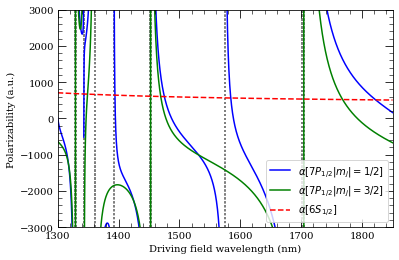

In [75]:
wavelengthList = np.linspace(1300, 1850,2000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, mj=0.5, debugOutput=True, units="au", line="b-")
ax = calc.plotPolarizability(wavelengthList, mj=1.5, debugOutput=True, units="au", addToPlotAxis=ax, line="g-")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-3000,3000)
ax.set_xlim(1300,1850)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=1/2]$' % printStateStringLatex(n,1,0.5))),
                    mlines.Line2D([], [], color="g", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=3/2]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1451.65 nm 9 2D 5/2
Resonance: 1453.15 nm 9 2D 3/2
Resonance: 1573.87 nm 10 2S 1/2
Resonance: 1451.65 nm 9 2D 5/2
Resonance: 1453.15 nm 9 2D 3/2


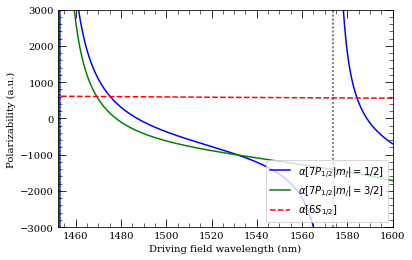

In [76]:
wavelengthList = np.linspace(1450, 1600,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, mj=0.5, debugOutput=True, units="au", line="b-")
ax = calc.plotPolarizability(wavelengthList, mj=1.5, debugOutput=True, units="au", addToPlotAxis=ax, line="g-")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-3000,3000)
ax.set_xlim(1452,1600)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=1/2]$' % printStateStringLatex(n,1,0.5))),
                    mlines.Line2D([], [], color="g", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=3/2]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1172.05 nm 14 2S 1/2
Resonance: 1186.07 nm 12 2D 3/2
Resonance: 1209.19 nm 13 2S 1/2
Resonance: 1229.93 nm 11 2D 3/2
Resonance: 1265.39 nm 12 2S 1/2
Resonance: 1298.32 nm 10 2D 3/2


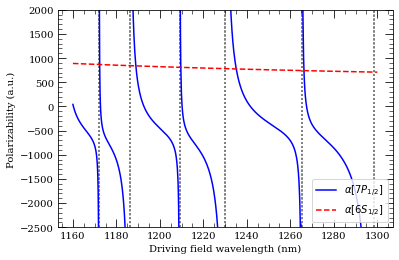

In [77]:
atom = Cesium()
n = 7
calc = DynamicPolarizability(atom, n, 1, 0.5)
calc.defineBasis(atom.groundStateN, n+15)
calc.getPolarizability(1100e-9,units="a.u.")


calcGroundState = DynamicPolarizability(atom, 6, 0, 0.5)
calcGroundState.defineBasis(atom.groundStateN, 25)

wavelengthList = np.linspace(1160, 1300,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, debugOutput=True, units="au")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-2500,2000)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()